<a href="https://colab.research.google.com/github/mtsilimos/ETH/blob/main/CV_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [429]:
import numpy as np
from skimage.io import imread
from skimage.io import imread_collection
dirName = '/content/drive/My Drive/images/*.png'
collection1 = imread_collection(dirName)
collection1

In [430]:
import cv2
import glob

for filename in glob.glob('/content/drive/My Drive/images/*.png'):
    print(filename)
    img=cv2.imread(filename)
    train_images=cv2.resize(img, (128, 128))

/content/drive/My Drive/images/105618339-super-purple-modern-suv-car-side-view.png
/content/drive/My Drive/images/156551_preview.png
/content/drive/My Drive/images/2009-Ford-Kuga-Show-Car-Side-1280x960.png
/content/drive/My Drive/images/1965-Shelby-Cobra-Roadster-Side-Profile.png
/content/drive/My Drive/images/2011-278656-pagani-huayra-side-view1.png
/content/drive/My Drive/images/2018-bm4-gt4-sports-car-side-view-pk.png
/content/drive/My Drive/images/2008-Morgan-Life-Car-Side-Speed-1024x768.png
/content/drive/My Drive/images/105618639-modern-pale-blue-suv-car-side-view.png
/content/drive/My Drive/images/178583_Side_Profile_Web.png
/content/drive/My Drive/images/003.png
/content/drive/My Drive/images/2015_aston_martin_db10_4.png
/content/drive/My Drive/images/G40-Junior-GT5-car-side.png
/content/drive/My Drive/images/2018-nissan-sentra-2017-nissan-sentra-car-nissan-micra-png-f.png
/content/drive/My Drive/images/2020-Honda-City-7-1068x672.png
/content/drive/My Drive/images/2019-acura-rd

In [431]:
import tensorflow
array_images = np.asarray(train_images).astype(np.float32)


In [432]:
array_images.shape

(128, 128, 3)

In [433]:
import numpy as np
from skimage.io import imread
from skimage.io import imread_collection
dirName = '/content/drive/My Drive/masks/*.png'
collection2 = imread_collection(dirName)
collection2

In [434]:
import cv2
import glob

for filename in glob.glob('/content/drive/My Drive/masks/*.png'):
    print(filename)
    img=cv2.imread(filename)
    test_images=cv2.resize(img, (128, 128))

/content/drive/My Drive/masks/1965-Shelby-Cobra-Roadster-Side-Profile.png
/content/drive/My Drive/masks/2009-Ford-Kuga-Show-Car-Side-1280x960.png
/content/drive/My Drive/masks/105618639-modern-pale-blue-suv-car-side-view.png
/content/drive/My Drive/masks/2008-Morgan-Life-Car-Side-Speed-1024x768.png
/content/drive/My Drive/masks/003.png
/content/drive/My Drive/masks/156551_preview.png
/content/drive/My Drive/masks/178583_Side_Profile_Web.png
/content/drive/My Drive/masks/105618339-super-purple-modern-suv-car-side-view.png
/content/drive/My Drive/masks/94374978-pretty-pink-modern-fast-city-car-side-view.png
/content/drive/My Drive/masks/2011-278656-pagani-huayra-side-view1.png
/content/drive/My Drive/masks/2019-acura-rdx-11.png
/content/drive/My Drive/masks/676069.png
/content/drive/My Drive/masks/865-8651925_fiat-tipo-company-car-side-view.png
/content/drive/My Drive/masks/IMG_20201123_132159.png
/content/drive/My Drive/masks/63-633585_infiniti-png-car-side-profile-png-transparent-png.p

In [443]:
test_images = np.asarray(test_images).astype(np.float32)

In [444]:
test_images.shape

(128, 128, 3)

In [445]:
train_images = array_images /255.0
train_images.shape


(128, 128, 3)

In [571]:
import tensorflow.keras as keras
import numpy as np
X= np.reshape(train_images, (-1, 128, 128, 3))
y = np.reshape(test_images, (-1, 128, 128, 3))





In [572]:
print(X.dtype)
print(y.dtype)

float32
float32


In [573]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

ValueError: ignored

In [568]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Lambda, Conv2D, Conv2DTranspose,MaxPooling2D, concatenate,UpSampling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.losses import BinaryCrossentropy
import random

import tensorflow as tf

inputs = Input((128, 128, 3))
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)

c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)

c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)

c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)

c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(3, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])



model.summary()


Model: "model_56"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_55 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_1022 (Conv2D)        (None, 128, 128, 16)         448       ['input_55[0][0]']            
                                                                                                  
 conv2d_1023 (Conv2D)        (None, 128, 128, 16)         2320      ['conv2d_1022[0][0]']         
                                                                                                  
 max_pooling2d_200 (MaxPool  (None, 64, 64, 16)           0         ['conv2d_1023[0][0]']         
 ing2D)                                                                                    

In [569]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [570]:
history = model.fit(X_train, y_train, batch_size=32, epochs=3,
                    validation_data=(X_valid, y_valid))

Epoch 1/3


ValueError: ignored

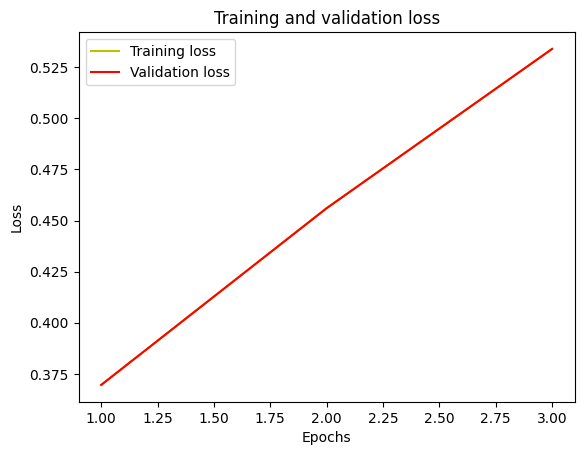

In [480]:
from matplotlib import pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Lambda, Conv2D, Conv2DTranspose,MaxPooling2D, concatenate,UpSampling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.losses im

import tensorflow as tf

inputs = Input((128, 128, 3))
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

In [551]:
# Set some parameters
im_width = 128
im_height = 128
border = 3

In [552]:
X = np.zeros((len(train_images), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((len(test_images), im_height, im_width, 1), dtype=np.float32)


In [553]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [556]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [557]:
model.fit(X_train, y_train, batch_size=32, epochs=3,
                    validation_data=(X_valid, y_valid))

Epoch 1/3


ValueError: ignored